In [12]:
# Initial imports.
import pandas as pd
import numpy as np
from path import Path
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import export_graphviz
import sqlite3

In [13]:
conn = sqlite3.connect('../HomelessData.db')
c = conn.cursor()

In [14]:
# Loading data
df_AllYears = pd.read_sql("SELECT * FROM CocData WHERE year < 2020", con = conn)

df_AllYears.head()

,Coc,TotalBeds,Emergency,Transitional,SafeHaven,RapidRehousing,PermanentSupportive,PermanentOther,Year,CocYear,TotalHomeless,Unsheltered,Sheltered,Population,Unemployment
0,AK-500,1033,799,234,0,171,601,71,2019,AK-500 2019,1111,97,1014,288000.0,4.400000
1,AK-501,845,575,270,0,67,386,0,2019,AK-501 2019,796,176,620,425343.0,6.991667
2,AL-500,827,516,277,34,106,1740,0,2019,AL-500 2019,981,326,655,965787.0,2.600000
3,AL-501,394,261,133,0,31,240,0,2019,AL-501 2019,505,202,303,636444.0,3.250000
4,AL-502,189,106,83,0,0,42,8,2019,AL-502 2019,390,201,189,209041.0,3.350000


In [15]:
df_AllYears=df_AllYears.drop(['TotalHomeless', 'Sheltered', 'TotalBeds', 'CocYear', 'Coc', 'Year'], axis=1)

In [16]:
df_AllYears['Unsheltered_perc_pop'] = (df_AllYears['Unsheltered'] / df_AllYears['Population']) *100

In [17]:
df_AllYears.head()

,Emergency,Transitional,SafeHaven,RapidRehousing,PermanentSupportive,PermanentOther,Unsheltered,Population,Unemployment,Unsheltered_perc_pop
0,799,234,0,171,601,71,97,288000.0,4.400000,0.033681
1,575,270,0,67,386,0,176,425343.0,6.991667,0.041378
2,516,277,34,106,1740,0,326,965787.0,2.600000,0.033755
3,261,133,0,31,240,0,202,636444.0,3.250000,0.031739
4,106,83,0,0,42,8,201,209041.0,3.350000,0.096153


In [18]:
df_AllYears['ES_beds_perc_pop'] = (df_AllYears['Emergency'] / df_AllYears['Population']) *100

In [19]:
df_AllYears['TS_beds_perc_pop'] = (df_AllYears['Transitional'] / df_AllYears['Population']) *100

In [20]:
df_AllYears['SH_beds_perc_pop'] = (df_AllYears['SafeHaven'] / df_AllYears['Population']) *100

In [21]:
df_AllYears['RRH_units_perc_pop'] = (df_AllYears['RapidRehousing'] / df_AllYears['Population']) *100

In [22]:
df_AllYears['RRH_units_perc_pop'] = (df_AllYears['RapidRehousing'] / df_AllYears['Population']) *100

In [23]:
df_AllYears['PSH_units_perc_pop'] = (df_AllYears['PermanentSupportive'] / df_AllYears['Population']) *100

In [24]:
df_AllYears['OPH_units_perc_pop'] = (df_AllYears['PermanentOther'] / df_AllYears['Population']) *100

In [25]:
df_AllYears.head()

,Emergency,Transitional,SafeHaven,RapidRehousing,PermanentSupportive,PermanentOther,Unsheltered,Population,Unemployment,Unsheltered_perc_pop,ES_beds_perc_pop,TS_beds_perc_pop,SH_beds_perc_pop,RRH_units_perc_pop,PSH_units_perc_pop,OPH_units_perc_pop
0,799,234,0,171,601,71,97,288000.0,4.400000,0.033681,0.277431,0.081250,0.00000,0.059375,0.208681,0.024653
1,575,270,0,67,386,0,176,425343.0,6.991667,0.041378,0.135185,0.063478,0.00000,0.015752,0.090750,0.000000
2,516,277,34,106,1740,0,326,965787.0,2.600000,0.033755,0.053428,0.028681,0.00352,0.010976,0.180164,0.000000
3,261,133,0,31,240,0,202,636444.0,3.250000,0.031739,0.041009,0.020897,0.00000,0.004871,0.037710,0.000000
4,106,83,0,0,42,8,201,209041.0,3.350000,0.096153,0.050708,0.039705,0.00000,0.000000,0.020092,0.003827


In [26]:
df_AllYears=df_AllYears.drop(['Emergency', 'Transitional', 'SafeHaven', 'RapidRehousing', 'PermanentSupportive', 'PermanentOther', 'Unsheltered'], axis=1)

In [27]:
df_AllYears.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2220 entries, 0 to 2219
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Population            2220 non-null   float64
 1   Unemployment          2220 non-null   float64
 2   Unsheltered_perc_pop  2220 non-null   float64
 3   ES_beds_perc_pop      2220 non-null   float64
 4   TS_beds_perc_pop      2220 non-null   float64
 5   SH_beds_perc_pop      2220 non-null   float64
 6   RRH_units_perc_pop    2220 non-null   float64
 7   PSH_units_perc_pop    2220 non-null   float64
 8   OPH_units_perc_pop    2220 non-null   float64
dtypes: float64(9)
memory usage: 156.2 KB


In [28]:
df_AllYears.head()

,Population,Unemployment,Unsheltered_perc_pop,ES_beds_perc_pop,TS_beds_perc_pop,SH_beds_perc_pop,RRH_units_perc_pop,PSH_units_perc_pop,OPH_units_perc_pop
0,288000.0,4.400000,0.033681,0.277431,0.081250,0.00000,0.059375,0.208681,0.024653
1,425343.0,6.991667,0.041378,0.135185,0.063478,0.00000,0.015752,0.090750,0.000000
2,965787.0,2.600000,0.033755,0.053428,0.028681,0.00352,0.010976,0.180164,0.000000
3,636444.0,3.250000,0.031739,0.041009,0.020897,0.00000,0.004871,0.037710,0.000000
4,209041.0,3.350000,0.096153,0.050708,0.039705,0.00000,0.000000,0.020092,0.003827


In [29]:
# Define the features set.
X = df_AllYears.copy()
X = X.drop("Unsheltered_perc_pop", axis=1)
X.head()

,Population,Unemployment,ES_beds_perc_pop,TS_beds_perc_pop,SH_beds_perc_pop,RRH_units_perc_pop,PSH_units_perc_pop,OPH_units_perc_pop
0,288000.0,4.400000,0.277431,0.081250,0.00000,0.059375,0.208681,0.024653
1,425343.0,6.991667,0.135185,0.063478,0.00000,0.015752,0.090750,0.000000
2,965787.0,2.600000,0.053428,0.028681,0.00352,0.010976,0.180164,0.000000
3,636444.0,3.250000,0.041009,0.020897,0.00000,0.004871,0.037710,0.000000
4,209041.0,3.350000,0.050708,0.039705,0.00000,0.000000,0.020092,0.003827


In [30]:
# Define the target set.
y = df_AllYears["Unsheltered_perc_pop"].ravel()
y[:5]

array([0.03368056, 0.04137837, 0.03375485, 0.03173885, 0.09615339])

In [31]:
# Splitting into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [32]:
regr = RandomForestRegressor(max_depth=3, random_state=0)

In [33]:
reg_model = regr.fit(X, y)

In [34]:
importances = reg_model.feature_importances_
importances

array([2.63330507e-01, 1.17817591e-01, 3.09694238e-02, 3.69594401e-01,
       2.39804310e-04, 4.52170208e-02, 1.70353099e-01, 2.47815386e-03])

In [35]:
# We can sort the features by their importance.
sorted(zip(reg_model.feature_importances_, X.columns), reverse=True)

[(0.36959440102648927, 'TS_beds_perc_pop'),
 (0.263330506966002, 'Population'),
 (0.17035309858384853, 'PSH_units_perc_pop'),
 (0.11781759057265631, 'Unemployment'),
 (0.0452170208447126, 'RRH_units_perc_pop'),
 (0.03096942383632975, 'ES_beds_perc_pop'),
 (0.0024781538604584123, 'OPH_units_perc_pop'),
 (0.00023980430950304064, 'SH_beds_perc_pop')]

In [36]:
%matplotlib inline
from matplotlib import pyplot as plt

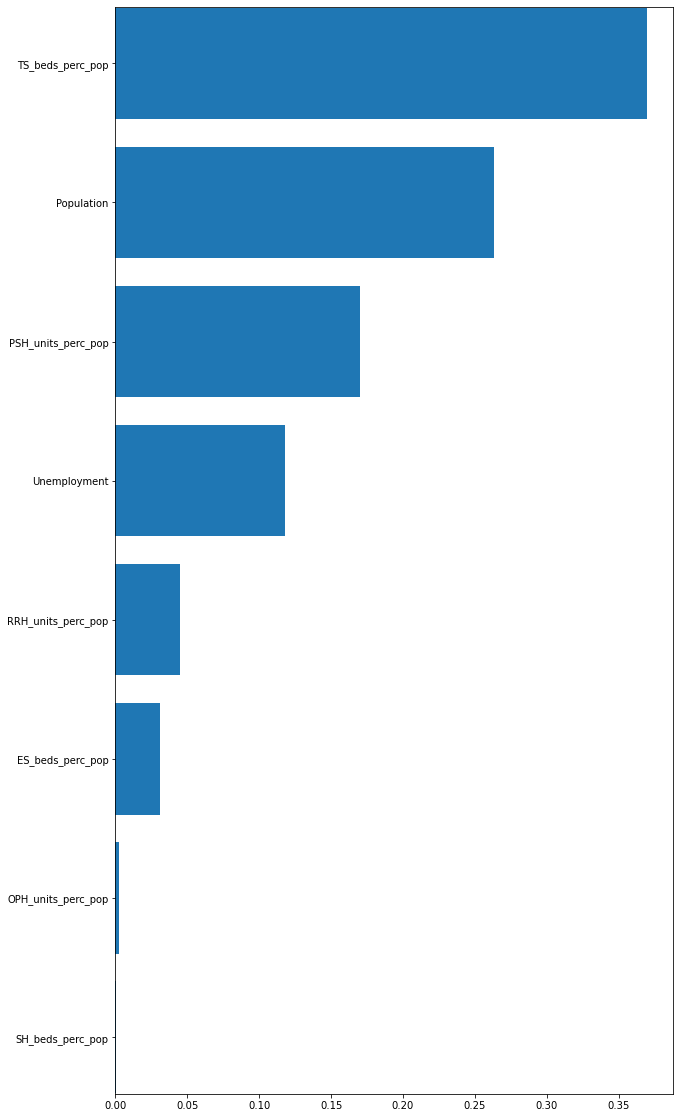

In [37]:
features = sorted(zip(X.columns, reg_model.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,20)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [38]:
estimator = reg_model.estimators_[5]

[Text(0.5, 0.875, 'X[3] <= 0.104\nsquared_error = 0.013\nsamples = 1405\nvalue = 0.065'),
 Text(0.25, 0.625, 'X[6] <= 0.743\nsquared_error = 0.009\nsamples = 1279\nvalue = 0.053'),
 Text(0.125, 0.375, 'X[6] <= 0.0\nsquared_error = 0.009\nsamples = 1273\nvalue = 0.051'),
 Text(0.0625, 0.125, 'squared_error = 0.04\nsamples = 23\nvalue = 0.185'),
 Text(0.1875, 0.125, 'squared_error = 0.008\nsamples = 1250\nvalue = 0.049'),
 Text(0.375, 0.375, 'X[0] <= 881122.5\nsquared_error = 0.001\nsamples = 6\nvalue = 0.512'),
 Text(0.3125, 0.125, 'squared_error = 0.0\nsamples = 5\nvalue = 0.499'),
 Text(0.4375, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 0.588'),
 Text(0.75, 0.625, 'X[1] <= 8.733\nsquared_error = 0.039\nsamples = 126\nvalue = 0.185'),
 Text(0.625, 0.375, 'X[0] <= 134649.0\nsquared_error = 0.029\nsamples = 119\nvalue = 0.168'),
 Text(0.5625, 0.125, 'squared_error = 0.051\nsamples = 33\nvalue = 0.239'),
 Text(0.6875, 0.125, 'squared_error = 0.019\nsamples = 86\nvalue = 0.141'),
 T

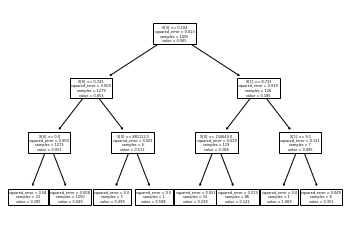

In [39]:
from sklearn import tree
tree.plot_tree(reg_model.estimators_[0])

In [40]:
df_AllYears.to_csv('AllYears_converted.csv', index=False)